In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from matplotlib.figure import Figure
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

!pip install category_encoders

In [50]:
import category_encoders as ce

In [51]:
encoder = ce.OneHotEncoder()

In [52]:
heart_data=pd.read_csv("heart.csv.xls")

In [53]:
y=heart_data['HeartDisease']

In [54]:
X=heart_data.drop('HeartDisease', axis='columns')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [56]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (734, 11) (734,)
Test (184, 11) (184,)


In [57]:
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)


In [58]:
print(X_train_enc)

     Age  Sex_1  Sex_2  ChestPainType_1  ChestPainType_2  ChestPainType_3  \
852   43      1      0                1                0                0   
121   52      0      1                0                1                0   
664   65      0      1                1                0                0   
187   41      1      0                1                0                0   
108   50      1      0                1                0                0   
..   ...    ...    ...              ...              ...              ...   
767   54      0      1                0                1                0   
72    52      1      0                1                0                0   
908   63      1      0                1                0                0   
235   39      1      0                0                0                0   
37    41      0      1                0                0                0   

     ChestPainType_4  RestingBP  Cholesterol  FastingBS  RestingECG_1  \
85

In [59]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=9000)

In [60]:
logmodel.fit(X_train_enc, y_train)

LogisticRegression(max_iter=9000)

In [61]:
predictions=logmodel.predict(X_test_enc)

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [63]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.88      0.86      0.87        74\n           1       0.91      0.92      0.91       110\n\n    accuracy                           0.90       184\n   macro avg       0.89      0.89      0.89       184\nweighted avg       0.90      0.90      0.90       184\n'

In [64]:
confusion_matrix(y_test,predictions)

array([[ 64,  10],
       [  9, 101]])

In [65]:
accuracy_score(y_test,predictions)

0.8967391304347826

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

## Random Forest Model

In [70]:
RF_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

In [72]:
RF_model.fit(X_train_enc, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [73]:
predictions=RF_model.predict(X_test_enc)

In [74]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.85      0.86      0.86        74\n           1       0.91      0.90      0.90       110\n\n    accuracy                           0.89       184\n   macro avg       0.88      0.88      0.88       184\nweighted avg       0.89      0.89      0.89       184\n'

In [75]:
confusion_matrix(y_test,predictions)

array([[64, 10],
       [11, 99]])

In [76]:
accuracy_score(y_test,predictions)

0.8858695652173914

In [78]:
importances = RF_model.feature_importances_

In [79]:
RF_model.feature_importances_

array([0.07609881, 0.02058312, 0.02320399, 0.07341021, 0.01842004,
       0.00656779, 0.02592578, 0.07672375, 0.10242444, 0.0194042 ,
       0.01457823, 0.00995056, 0.01015348, 0.09686317, 0.04647076,
       0.05893262, 0.0949282 , 0.11694097, 0.10310389, 0.00531597])

<AxesSubplot:>

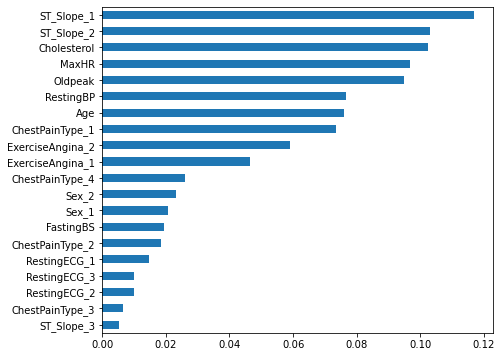

In [81]:
feature_importances = pd.Series(RF_model.feature_importances_, index=X_train_enc.columns)
sorted_features=feature_importances.sort_values()
#feature_importances.plot(kind='barh', figsize=(7,6))
sorted_features.plot(kind='barh', figsize=(7,6))

In [83]:
from sklearn.inspection import plot_partial_dependence

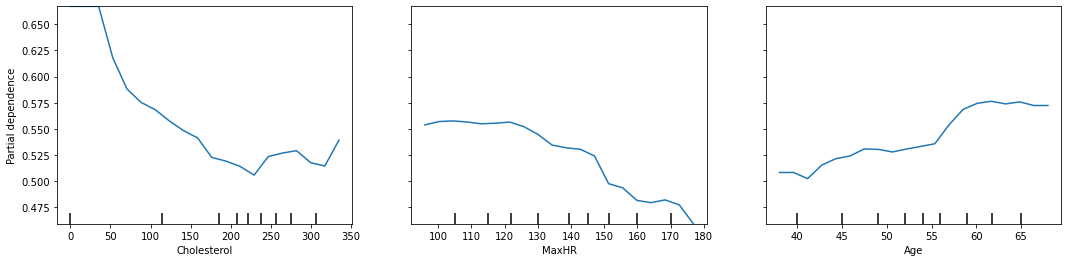

In [91]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['Cholesterol', "MaxHR", "Age"], 
                        grid_resolution=20, ax=ax)

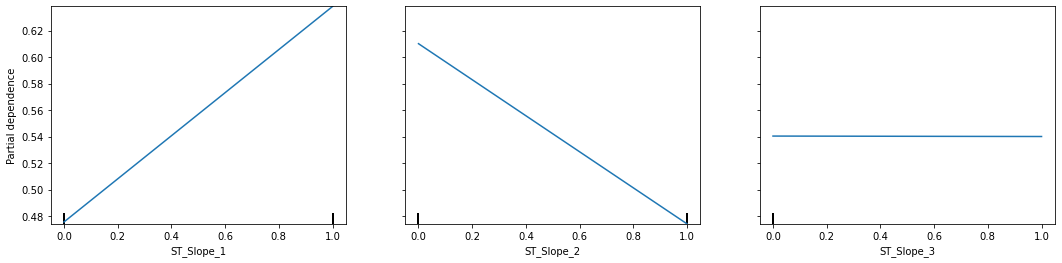

In [92]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['ST_Slope_1', "ST_Slope_2", "ST_Slope_3"], 
                        grid_resolution=20, ax=ax)

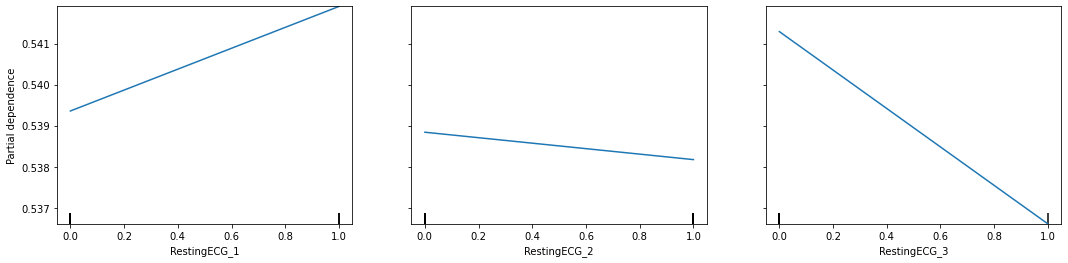

In [93]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['RestingECG_1', "RestingECG_2", "RestingECG_3"], 
                        grid_resolution=20, ax=ax)